In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

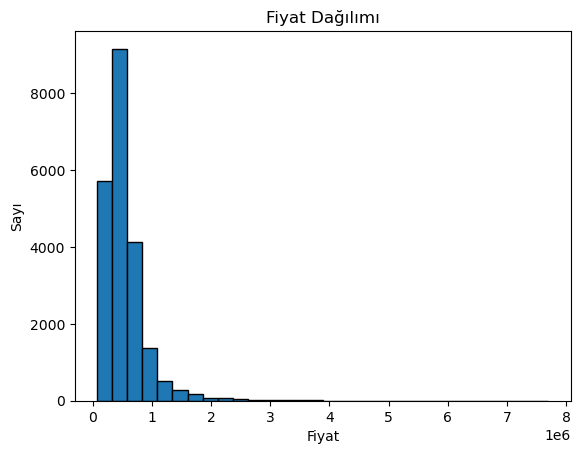

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.title('Fiyat Dağılımı')
plt.show()


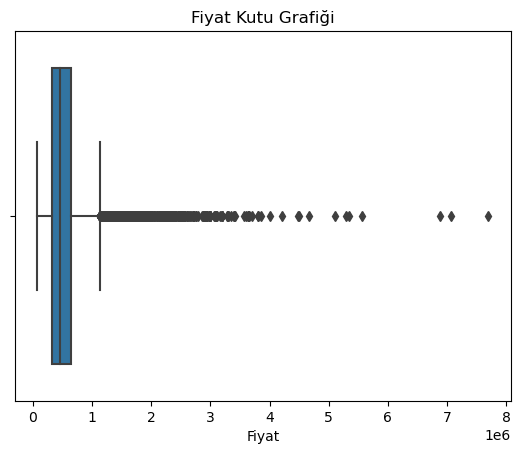

In [6]:
import seaborn as sns

sns.boxplot(x=df['price'])
plt.xlabel('Fiyat')
plt.title('Fiyat Kutu Grafiği')
plt.show()


C:\Users\tkaan\AppData\Local\Temp\ipykernel_6368\3799175658.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


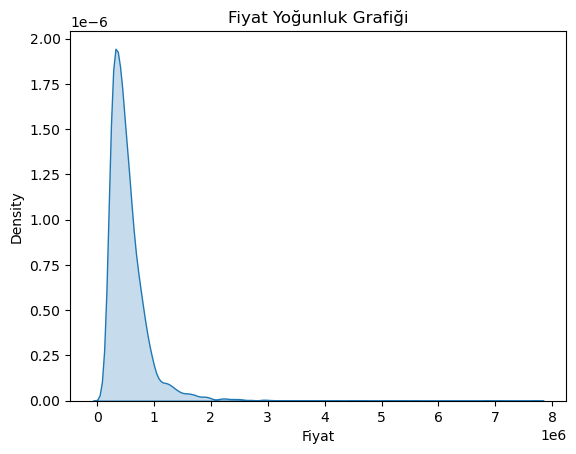

In [7]:
sns.kdeplot(df['price'], shade=True)
plt.xlabel('Fiyat')
plt.title('Fiyat Yoğunluk Grafiği')
plt.show()


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# "bedrooms" sütunundaki aykırı değerlere sahip satırları filtreleyin ve temiz bir veri çerçevesi oluşturun
bedrooms_upper_limit = df['bedrooms'].mean() + 3 * df['bedrooms'].std()  # Özel bir sınırlama belirleyin
df_filtered = df[df['bedrooms'] <= bedrooms_upper_limit]

# Temizlenmiş verileri "X" ve "y" değişkenlerine atayın
X = df_filtered.drop(columns=['price'])
y = df_filtered[['price']]

In [10]:
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [12]:
X.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.155100e+04,21551.000000,21551.000000,21551.000000,2.155100e+04,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000
mean,4.581140e+09,3.357431,2.110331,2074.802237,1.510500e+04,1.493573,0.007563,0.233864,3.409308,7.655236,1785.039581,289.762656,1971.044499,84.087606,98077.917498,47.559886,-122.213778,1985.768224,12769.993504
std,2.876787e+09,0.879087,0.763482,910.036434,4.142890e+04,0.539801,0.086641,0.765719,0.650629,1.174130,823.582445,439.884377,29.358078,400.958364,53.515773,0.138654,0.140908,684.758152,27303.940653
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000
75%,7.312050e+09,4.000000,2.500000,2540.000000,1.067600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21551 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21551 non-null  int64  
 1   date           21551 non-null  object 
 2   bedrooms       21551 non-null  int64  
 3   bathrooms      21551 non-null  float64
 4   sqft_living    21551 non-null  int64  
 5   sqft_lot       21551 non-null  int64  
 6   floors         21551 non-null  float64
 7   waterfront     21551 non-null  int64  
 8   view           21551 non-null  int64  
 9   condition      21551 non-null  int64  
 10  grade          21551 non-null  int64  
 11  sqft_above     21551 non-null  int64  
 12  sqft_basement  21551 non-null  int64  
 13  yr_built       21551 non-null  int64  
 14  yr_renovated   21551 non-null  int64  
 15  zipcode        21551 non-null  int64  
 16  lat            21551 non-null  float64
 17  long           21551 non-null  float64
 18  sqft_l

In [14]:
# 'date' sütununu datetime formatına çevirin
X['date'] = pd.to_datetime(X['date'])

# Şimdi 'date' sütunu datetime formatına dönüştü ve üzerinde tarihle ilgili işlemler yapabilirsiniz


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21551 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21551 non-null  int64         
 1   date           21551 non-null  datetime64[ns]
 2   bedrooms       21551 non-null  int64         
 3   bathrooms      21551 non-null  float64       
 4   sqft_living    21551 non-null  int64         
 5   sqft_lot       21551 non-null  int64         
 6   floors         21551 non-null  float64       
 7   waterfront     21551 non-null  int64         
 8   view           21551 non-null  int64         
 9   condition      21551 non-null  int64         
 10  grade          21551 non-null  int64         
 11  sqft_above     21551 non-null  int64         
 12  sqft_basement  21551 non-null  int64         
 13  yr_built       21551 non-null  int64         
 14  yr_renovated   21551 non-null  int64         
 15  zipcode        2155

In [17]:
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [19]:
# Korelasyon matrisini oluşturun
corr_matrix = df.corr()

# Korelasyon matrisinde 'price' sütunu ile olan korelasyonları alın
corr_with_price = corr_matrix['price']

# Korelasyon değeri 0.2'den küçük olan sütunları filtreleyin
low_corr_cols = corr_with_price[abs(corr_with_price) < 0.2].index

# X veri setinden düşük korelasyonlu sütunları çıkarın
X = df.drop(low_corr_cols, axis=1)

C:\Users\tkaan\AppData\Local\Temp\ipykernel_6368\3504444342.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [20]:
X

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [21]:
# "date" sütununu çıkarın
X = df.drop(['date', 'price'], axis=1)

In [22]:
X.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [41]:
# Aykırı değerleri belirleyin (örneğin, yatak odası sayısı için)
bedrooms_threshold = 6  # Örneğin, 7 yatak odasından fazla olan evleri aykırı kabul ediyoruz.

# Eşik değerin altındaki satırları filtreleyin
cleaned_df = df[df['bedrooms'] <= bedrooms_threshold]

# "date" sütununu çıkarın
X = cleaned_df.drop(['date', 'price'], axis=1)

# y verisini 'price' sütunundan alın
y = cleaned_df[['price']]


In [42]:
X.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.155100e+04,21551.000000,21551.000000,21551.000000,2.155100e+04,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000
mean,4.581140e+09,3.357431,2.110331,2074.802237,1.510500e+04,1.493573,0.007563,0.233864,3.409308,7.655236,1785.039581,289.762656,1971.044499,84.087606,98077.917498,47.559886,-122.213778,1985.768224,12769.993504
std,2.876787e+09,0.879087,0.763482,910.036434,4.142890e+04,0.539801,0.086641,0.765719,0.650629,1.174130,823.582445,439.884377,29.358078,400.958364,53.515773,0.138654,0.140908,684.758152,27303.940653
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000
75%,7.312050e+09,4.000000,2.500000,2540.000000,1.067600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
y.shape

(21551, 1)

In [44]:
y.describe()

,price
count,2.155100e+04
mean,5.388814e+05
std,3.649685e+05
min,7.500000e+04
25%,3.210000e+05
50%,4.500000e+05
75%,6.430000e+05
max,7.700000e+06


In [45]:
X.shape

(21551, 19)

In [46]:
# "bedrooms" sütunundaki farklı değerleri sayın
bedroom_counts = X['bedrooms'].value_counts()

# Sonucu yazdırın
print(bedroom_counts)


3    9824
4    6882
2    2760
5    1601
6     272
1     199
0      13
Name: bedrooms, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

# Modeli oluşturun
model = LinearRegression()

# Modeli eğitin
model.fit(X_train, y_train)


LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Tahminleri yapın
y_pred = model.predict(X_test)

# Hata ölçümlerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("R-kare (R2):", r2)


Ortalama Kare Hata (MSE): 39571838631.13047
R-kare (R2): 0.7030366318726351


In [53]:
mean_squared_error(y_test, y_pred)**5

9.703561150301414e+52